# Run training for Pine

In [1]:
import sys
import os
path_to_top_dir = "../"
# Dynamically add the `project` directory to the path
sys.path.append(os.path.abspath(path_to_top_dir))

In [2]:
os.path.abspath(path_to_top_dir)

'c:\\Users\\paulj\\Desktop\\prosjekt\\pom_cpu-model'

In [3]:
# Print current working directory
os.getcwd()

'c:\\Users\\paulj\\Desktop\\prosjekt\\pom_cpu-model\\runs'

In [4]:
# Import scent_gfn functions
from scent_gfn.fragments import FRAGMENTS, FRAGMENTS_OPENPOM_DATASET, FRAGMENTS_OPENPOM_VANILLA
from scent_gfn.molecule import MoleculeTrainer

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped loading some PyTorch models, missing a dependency. No module named 'tensorflow'
c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module impli

| **Parameter**                | **Value**      |
|------------------------------|----------------|
| Reward function type         | OpenPOM        |
| Similarity measure           | Cosine         |
| Graph building               | Fragments      |
| Iterations                   | 100            |
| Max number of nodes          | 6              |
| Illegal action logreward     | -100           |
| β                            | 1              |
| Large molecule penalty       | None           |

In [5]:
params = {
    "save_name": "pine1",
    "reward_func": "openpom", # structure,openpom
    "similarity": "cosine", 
    "graph_building": FRAGMENTS, # None
    "iterations": 20,
    "max_nodes": 6,
    "illegal_logreward": -100,
    "beta": 1.0,
    "large_mol_pen": [None, None] # ["exponential", 15] , ["hard", 15]
}

In [6]:
# Utilities
import warnings
import random
import datetime

# Data processing and file management
import pathlib
import pandas as pd
import json

# Machine learning
import torch
from gflownet.config import init_empty, Config
from rdkit.Chem.Draw import MolsToGridImage

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Run on cpu
dev = torch.device('cpu')

In [7]:
def get_pine_openpom_target():
    with open('../data/pine_target_2.json', 'r') as file:
        target = json.load(file)
    return [target]
target = get_pine_openpom_target()


In [8]:

# Initialize model
config = init_empty(Config())
config.print_every = 1
config.log_dir = f"{os.path.abspath(path_to_top_dir)}/results/{params['save_name']}_{datetime.datetime.now().strftime('%Y-%m-%d__%H_%M_%S')}"
config.device = dev
config.num_training_steps = params["iterations"]
config.num_workers = 0
config.num_validation_gen_steps = 1
config.overwrite_existing_exp=False
config.checkpoint_every = 100
config.algo.max_nodes = params["max_nodes"] #12 # 95 quantil
config.store_all_checkpoints = True
config.algo.illegal_action_logreward = params["illegal_logreward"]


trial = MoleculeTrainer(config,(params["reward_func"], params["similarity"],params["large_mol_pen"], target, params["beta"]),fragments=FRAGMENTS, print_config=True) #,fragments=FRAGMENTS, print_config=True)

OpenPOM input data detected ...
Reward function: reward_function_openpom | Similarity measure: cosine_similarity | exp_penalty: False | max_mol=None
Building molecules using fragments ...


Hyperparameters:

desc: noDesc
log_dir: c:\Users\paulj\Desktop\prosjekt\pom_cpu-model/results/pine1_2024-12-03__13_56_52
device: cpu
seed: 0
validate_every: 1000
checkpoint_every: 100
store_all_checkpoints: true
print_every: 1
start_at_step: 0
num_final_gen_steps: null
num_validation_gen_steps: 1
num_training_steps: 20
num_workers: 0
hostname: null
pickle_mp_messages: false
git_hash: f106cde
overwrite_existing_exp: false
algo:
  method: TB
  num_from_policy: 64
  num_from_dataset: 0
  valid_num_from_policy: 64
  valid_num_from_dataset: 0
  max_len: 128
  max_nodes: 6
  max_edges: 128
  illegal_action_logreward: -100.0
  train_random_action_prob: 0.0
  train_det_after: null
  valid_random_action_prob: 0.0
  sampling_tau: 0.9
  tb:
    bootstrap_own_reward: false
    epsilon: null
    reward_loss_mult

In [9]:
trial.run()

03/12/2024 13:56:53 - INFO - logger - Starting training


O=S(=O)([O-])N1CCN(C2CCCC2)CC1
[0.06015679738840933, 0.2096520848804386, 0.08337212983168577, 0.08833910965233836, 0.33611651818681026, 0.2683353735141846, 0.18713417120227516, 0.14195575260378707, 0.14449604032223276, 0.20086818243282617, 0.2132034207126755, 0.07270558673900183, 0.08896248758001175, 0.13861516825684683, 0.23600614840486922, 0.13562119613872434, 0.15948043746026003, 0.06946793856840223, 0.1308044386701302, 0.06632552447455668, 0.08598226886908046, 0.5034001017320543, 0.09890932734264743, 0.2949652432498446, 0.18833663737922687, 0.06883266367025447, 0.10587180789255148, 0.07161808864561585, 0.1121648297552572, 0.10791982549812146, 0.3205061446731162, 0.3016804498095253, 0.08729671677365931, 0.13039261903120677, 0.0757116518943597, 0.09356458180606332, 0.032943046050063526, 0.12056190994915207, 0.34796384320511364, 0.1525630652238192, 0.1136068681045508, 0.11699377660423649, 0.0567811280777513, 0.07754659676447415, 0.2593262748697287, 0.49506284950736307, 0.1287250255927

In [11]:
from rdkit import Chem

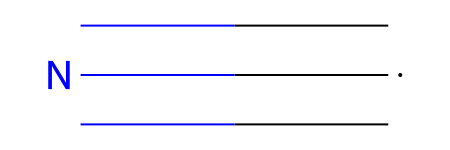

In [12]:
Chem.MolFromSmiles("[C]#N")

CC(C)=CC1CCCC1
[0.06015679738840933, 0.2096520848804386, 0.08337212983168577, 0.08833910965233836, 0.33611651818681026, 0.2683353735141846, 0.18713417120227516, 0.14195575260378707, 0.14449604032223276, 0.20086818243282617, 0.2132034207126755, 0.07270558673900183, 0.08896248758001175, 0.13861516825684683, 0.23600614840486922, 0.13562119613872434, 0.15948043746026003, 0.06946793856840223, 0.1308044386701302, 0.06632552447455668, 0.08598226886908046, 0.5034001017320543, 0.09890932734264743, 0.2949652432498446, 0.18833663737922687, 0.06883266367025447, 0.10587180789255148, 0.07161808864561585, 0.1121648297552572, 0.10791982549812146, 0.3205061446731162, 0.3016804498095253, 0.08729671677365931, 0.13039261903120677, 0.0757116518943597, 0.09356458180606332, 0.032943046050063526, 0.12056190994915207, 0.34796384320511364, 0.1525630652238192, 0.1136068681045508, 0.11699377660423649, 0.0567811280777513, 0.07754659676447415, 0.2593262748697287, 0.49506284950736307, 0.12872502559275145, 0.14567208

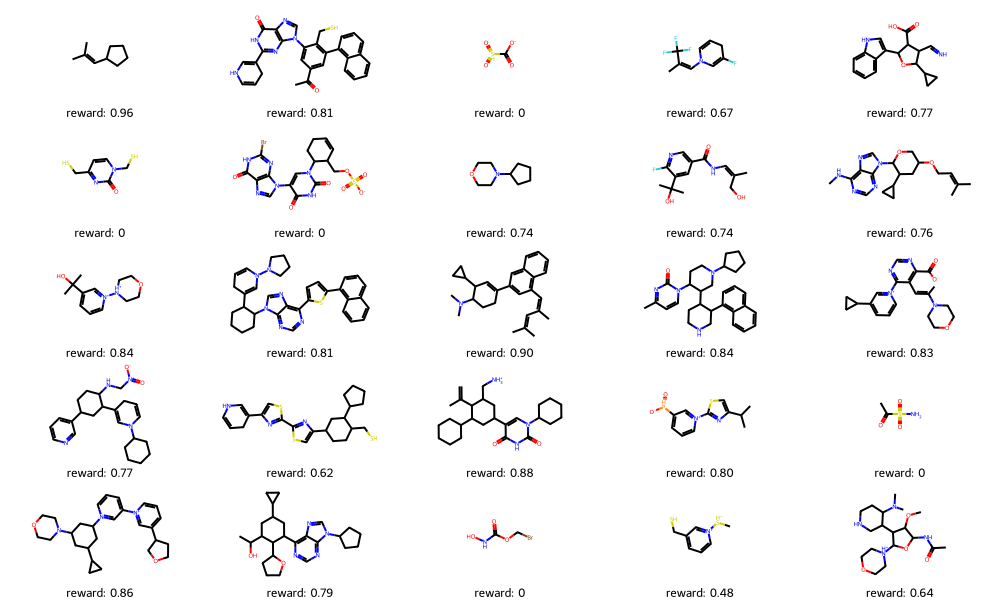

In [10]:
# Generate molecules
trajs = trial.algo.create_training_data_from_own_samples(trial.model, 25)
objs = [trial.ctx.graph_to_obj(i['result']) for i in trajs]
obj_props, is_valid = trial.task.compute_obj_properties(objs)
log_rewards = trial.task.cond_info_to_logreward({'beta': torch.ones(len(trajs))}, obj_props)
index = 0
rewards = []
for i in is_valid:
    if i:
        rewards.append(list(log_rewards)[index])
        index += 1 
    else:
        rewards.append(0)

MolsToGridImage(objs[:25], molsPerRow=5, subImgSize=(200, 120), legends=[f'reward: {r}' if r==0 else f'reward: {r.exp().item():.2f}' for r in rewards[:25]])

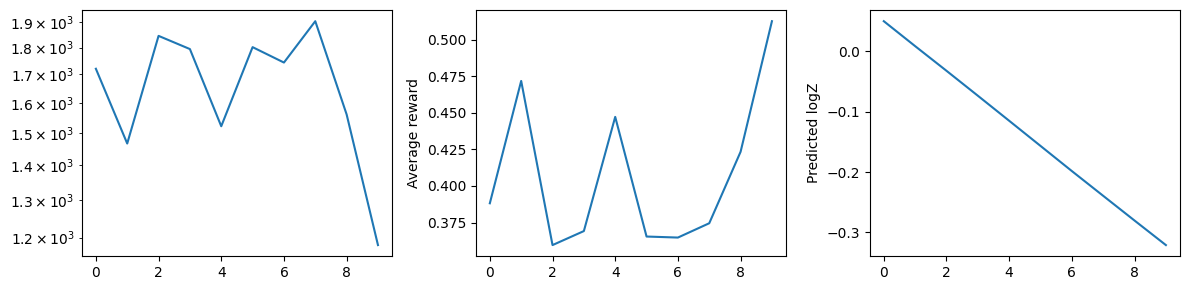

In [14]:
from gflownet.config import init_empty, Config
cfg = init_empty(Config())
from tensorboard.backend.event_processing import event_accumulator
cfg.log_dir = config.log_dir
ea = event_accumulator.EventAccumulator(cfg.log_dir)
ea.Reload()

import matplotlib.pyplot as pp
f, ax = pp.subplots(1, 3, figsize=(4*3,3))
ax[0].plot([i.value for i in ea.Scalars('train_loss')])
ax[0].set_yscale('log')
ax[1].set_ylabel('TB loss')
ax[1].plot([i.value for i in ea.Scalars('train_sampled_reward_avg')])
ax[1].set_ylabel('Average reward')
ax[2].plot([i.value for i in ea.Scalars('train_logZ')])
ax[2].set_ylabel('Predicted logZ')
pp.tight_layout()

In [16]:
tags = ea.Tags()
print("Available tags:", tags)

Available tags: {'images': [], 'audio': [], 'histograms': [], 'scalars': ['train_offline_loss', 'train_online_loss', 'train_reward_loss', 'train_invalid_trajectories', 'train_invalid_logprob', 'train_invalid_losses', 'train_backward_vs_unif', 'train_logZ', 'train_loss', 'train_n_loss', 'train_tb_loss', 'train_batch_entropy', 'train_traj_lens', 'train_grad_norm', 'train_grad_norm_clip', 'train_sampled_reward_avg', 'train_train_time', 'train_time_spent'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


In [12]:
from pycirclize import Circos
import pandas as pd
import matplotlib.pyplot as plt
from pom_models.functions import fragance_propabilities_from_smiles
from rdkit import Chem
import numpy as np

In [14]:
indices = np.argsort(-np.array(target))
indices

array([ 64, 137,  60,  53,  51,  21,  45,  82,  50, 119, 126,  38, 123,
         4,  30,  99,  31,  58,  23, 110, 125,  86,   5,  85,  73,  44,
        72, 128, 124,  87,  74,  14, 132,  78, 112,  98, 131,  10, 130,
         1,  88, 104,   9,  94,  83,  80, 133,  24,   6,  71,  90, 121,
        56, 117, 114,  75,  16,  69,  95, 107,  39, 135,  62, 134,  92,
        59,  47, 109,  66,   8, 105, 108,  65,   7, 118,  13, 103,  52,
        15,  67,  49, 101,  18,  33,  46,  96, 116,  77,  70,  37, 100,
       113,  41, 111, 106,  79,  93,  40,  28,  48, 102,  29,  26,  63,
        22,  91,  84,  57,  97,  35, 115, 127,  55,  61, 122,  12,   3,
        32,  68,  20,   2, 120,  81,  43,  34, 136,  11,  54,  27,  17,
        25,  19,  76, 129,   0,  42,  89,  36], dtype=int64)

In [16]:
labels = df.keys()[2:]
labels

Index(['alcoholic', 'aldehydic', 'alliaceous', 'almond', 'amber', 'animal',
       'anisic', 'apple', 'apricot', 'aromatic',
       ...
       'tropical', 'vanilla', 'vegetable', 'vetiver', 'violet', 'warm', 'waxy',
       'weedy', 'winey', 'woody'],
      dtype='object', length=138)

In [25]:
data_lst  = []
for i, obj in enumerate(objs):
    smiles = Chem.MolToSmiles(obj)
    probs = fragance_propabilities_from_smiles(smiles)[0]

    data_lst.append( [smiles] + list(probs))
result_df = pd.DataFrame(
    data=data_lst,
    index=[i for i in range(len(data_lst))],
    columns=["smiles"]+list(labels)
    )
result_df.head()


smiles  alcoholic  aldehydic  \
0  CC=Cc1ccc(-c2ccccc2)nc1-c1ccncc1C1CCC(c2ncccn2...   0.069776   0.153556   
1  C1=CNC=C(c2ccc(-c3cc(C4CCCCO4)ccc3C3COCC3c3ccc...   0.061807   0.138917   
2  NC(=O)n1cnc2c(C3CC(c4cc[nH]c4)OC(c4ccccn4)C3c3...   0.073982   0.152314   
3  [NH3+]Cc1nc(-c2cscn2)ncc1-c1cccc(-c2cccc(C3CCC...   0.071527   0.139928   
4  O=c1[nH]c(-c2cccc(-c3cccc(-c4ccc(C5CCCCC5C5CCC...   0.066674   0.139203   

   alliaceous    almond     amber    animal    anisic     apple   apricot  \
0    0.099827  0.402382  0.146904  0.439994  0.269701  0.069901  0.102523   
1    0.124202  0.366594  0.171433  0.492144  0.179461  0.060116  0.099165   
2    0.145837  0.444088  0.125184  0.408273  0.186333  0.074473  0.098976   
3    0.113312  0.363613  0.194153  0.484348  0.241197  0.071331  0.123056   
4    0.149508  0.381778  0.153466  0.466547  0.176261  0.062686  0.093575   

   ...  tropical   vanilla  vegetable   vetiver    violet      warm      waxy  \
0  ...  0.175588  0.242265   0.143761  0.104901  0.078149  0.258849  0.196291   
1  ...  0.149967  0.171135   0.157905  0.100572  0.074436  0.241837  0.186080   
2  ...  0.179454  0.264533   0.154011  0.103656  0.058125  0.254636  0.147292   
3  ...  0.179949  0.174847   0.166743  0.112877  0.088852  0.229042  0.239815   
4  ...  0.170937  0.201472   0.193817  0.102865  0.067999  0.226404  0.163439   

      weedy     winey     woody  
0  0.134099  0.126378  0.330897  
1  0.134500  0.104646  0.308324  
2  0.145878  0.148205  0.328596  
3  0.137551  0.136907  0.318456  
4  0.134856  0.116684  0.330685  

[5 rows x 139 columns]

In [68]:
target_df = pd.DataFrame(
    data=[["target"] + list(target)],
    columns=result_df.keys(),
    index=["Target"]
)
target_df

smiles  alcoholic  aldehydic  alliaceous    almond     amber  \
Target  target   0.060157   0.209652    0.083372  0.088339  0.336117   

          animal    anisic     apple   apricot  ...  tropical   vanilla  \
Target  0.268335  0.187134  0.141956  0.144496  ...  0.256422  0.063885   

        vegetable   vetiver    violet      warm      waxy     weedy     winey  \
Target   0.211703  0.215956  0.225055  0.188657  0.149626  0.152026  0.074805   

           woody  
Target  0.561436  

[1 rows x 139 columns]

In [30]:
most_important_indicies = indices[:8]
most_important_keys = []
for i in most_important_indicies:
    most_important_keys.append(labels[i])
most_important_keys

['herbal',
 'woody',
 'green',
 'fruity',
 'fresh',
 'camphoreous',
 'earthy',
 'mint']

In [79]:
rewards_plot = [f'{r}' if r==-1 else f'{r.exp().item():.2f}' for r in rewards[:25]]
rewards_plot

['0.70',
 '0.73',
 '0.74',
 '0.72',
 '0.75',
 '0.78',
 '0.74',
 '0.73',
 '0.73',
 '0.76',
 '0.74',
 '0.79',
 '0.72',
 '0.80',
 '0.76',
 '0.75',
 '0.73',
 '-1',
 '0.72',
 '0.68',
 '0.78',
 '0.75',
 '0.74',
 '0.71',
 '0.76']

In [82]:
plot_df = result_df[most_important_keys].set_index(pd.Series([f"{i+1} r:{rewards_plot[i]}" for i in range(len(result_df["smiles"]))]))
plot_df

herbal     woody     green    fruity     fresh  camphoreous  \
1 r:0.70   0.368094  0.330897  0.425910  0.443748  0.267390     0.169610   
2 r:0.73   0.294593  0.308324  0.322688  0.410055  0.213210     0.166270   
3 r:0.74   0.290509  0.328596  0.285294  0.421802  0.205202     0.155920   
4 r:0.72   0.358809  0.318456  0.468388  0.432952  0.271824     0.206908   
5 r:0.75   0.287300  0.330685  0.311546  0.412037  0.208565     0.172571   
6 r:0.78   0.182618  0.203277  0.165164  0.235379  0.100871     0.091571   
7 r:0.74   0.275967  0.296983  0.258811  0.400231  0.221381     0.160613   
8 r:0.73   0.326077  0.303185  0.382644  0.417231  0.253960     0.192523   
9 r:0.73   0.310999  0.304116  0.349419  0.413104  0.237467     0.186510   
10 r:0.76  0.253020  0.347671  0.213475  0.381569  0.169357     0.134993   
11 r:0.74  0.198602  0.308167  0.300016  0.337904  0.128329     0.118076   
12 r:0.79  0.143668  0.257713  0.150923  0.314463  0.112767     0.077271   
13 r:0.72  0.301320  0.326540  0.354685  0.406240  0.251264     0.179504   
14 r:0.80  0.211331  0.331121  0.233339  0.350115  0.176412     0.160793   
15 r:0.76  0.227407  0.307530  0.220036  0.344294  0.152955     0.172492   
16 r:0.75  0.297689  0.326757  0.258348  0.340328  0.220759     0.185199   
17 r:0.73  0.289932  0.306849  0.337943  0.434554  0.252221     0.181258   
18 r:-1    0.123548  0.158362  0.119637  0.219423  0.086070     0.051814   
19 r:0.72  0.182281  0.314394  0.173218  0.243396  0.085447     0.084501   
20 r:0.68  0.320848  0.272693  0.424277  0.430092  0.227365     0.157252   
21 r:0.78  0.238534  0.334504  0.257013  0.374431  0.178583     0.140218   
22 r:0.75  0.176416  0.318134  0.210015  0.330937  0.115485     0.100866   
23 r:0.74  0.264973  0.306655  0.311559  0.403515  0.214938     0.173023   
24 r:0.71  0.338862  0.318522  0.332845  0.426389  0.239368     0.184573   
25 r:0.76  0.195005  0.290134  0.173161  0.252996  0.110642     0.110815   

             earthy      mint  
1 r:0.70   0.353724  0.178364  
2 r:0.73   0.292193  0.181642  
3 r:0.74   0.271813  0.160209  
4 r:0.72   0.414255  0.195107  
5 r:0.75   0.313930  0.193488  
6 r:0.78   0.176723  0.161200  
7 r:0.74   0.215575  0.227584  
8 r:0.73   0.345738  0.208983  
9 r:0.73   0.310535  0.218014  
10 r:0.76  0.257461  0.165206  
11 r:0.74  0.478390  0.122739  
12 r:0.79  0.278956  0.124404  
13 r:0.72  0.319612  0.233586  
14 r:0.80  0.321676  0.204743  
15 r:0.76  0.308910  0.254658  
16 r:0.75  0.242084  0.308225  
17 r:0.73  0.272369  0.225847  
18 r:-1    0.141139  0.082083  
19 r:0.72  0.300377  0.102483  
20 r:0.68  0.324674  0.137788  
21 r:0.78  0.332839  0.190959  
22 r:0.75  0.331477  0.119101  
23 r:0.74  0.308567  0.155132  
24 r:0.71  0.285873  0.188249  
25 r:0.76  0.264889  0.196687

In [69]:
plot_target_df = target_df[most_important_keys]
plot_target_df

herbal     woody     green   fruity    fresh  camphoreous    earthy  \
Target  0.615864  0.561436  0.519596  0.51449  0.51066       0.5034  0.495063   

            mint  
Target  0.460149

In [ ]:
plot_df.loc["target"] = []

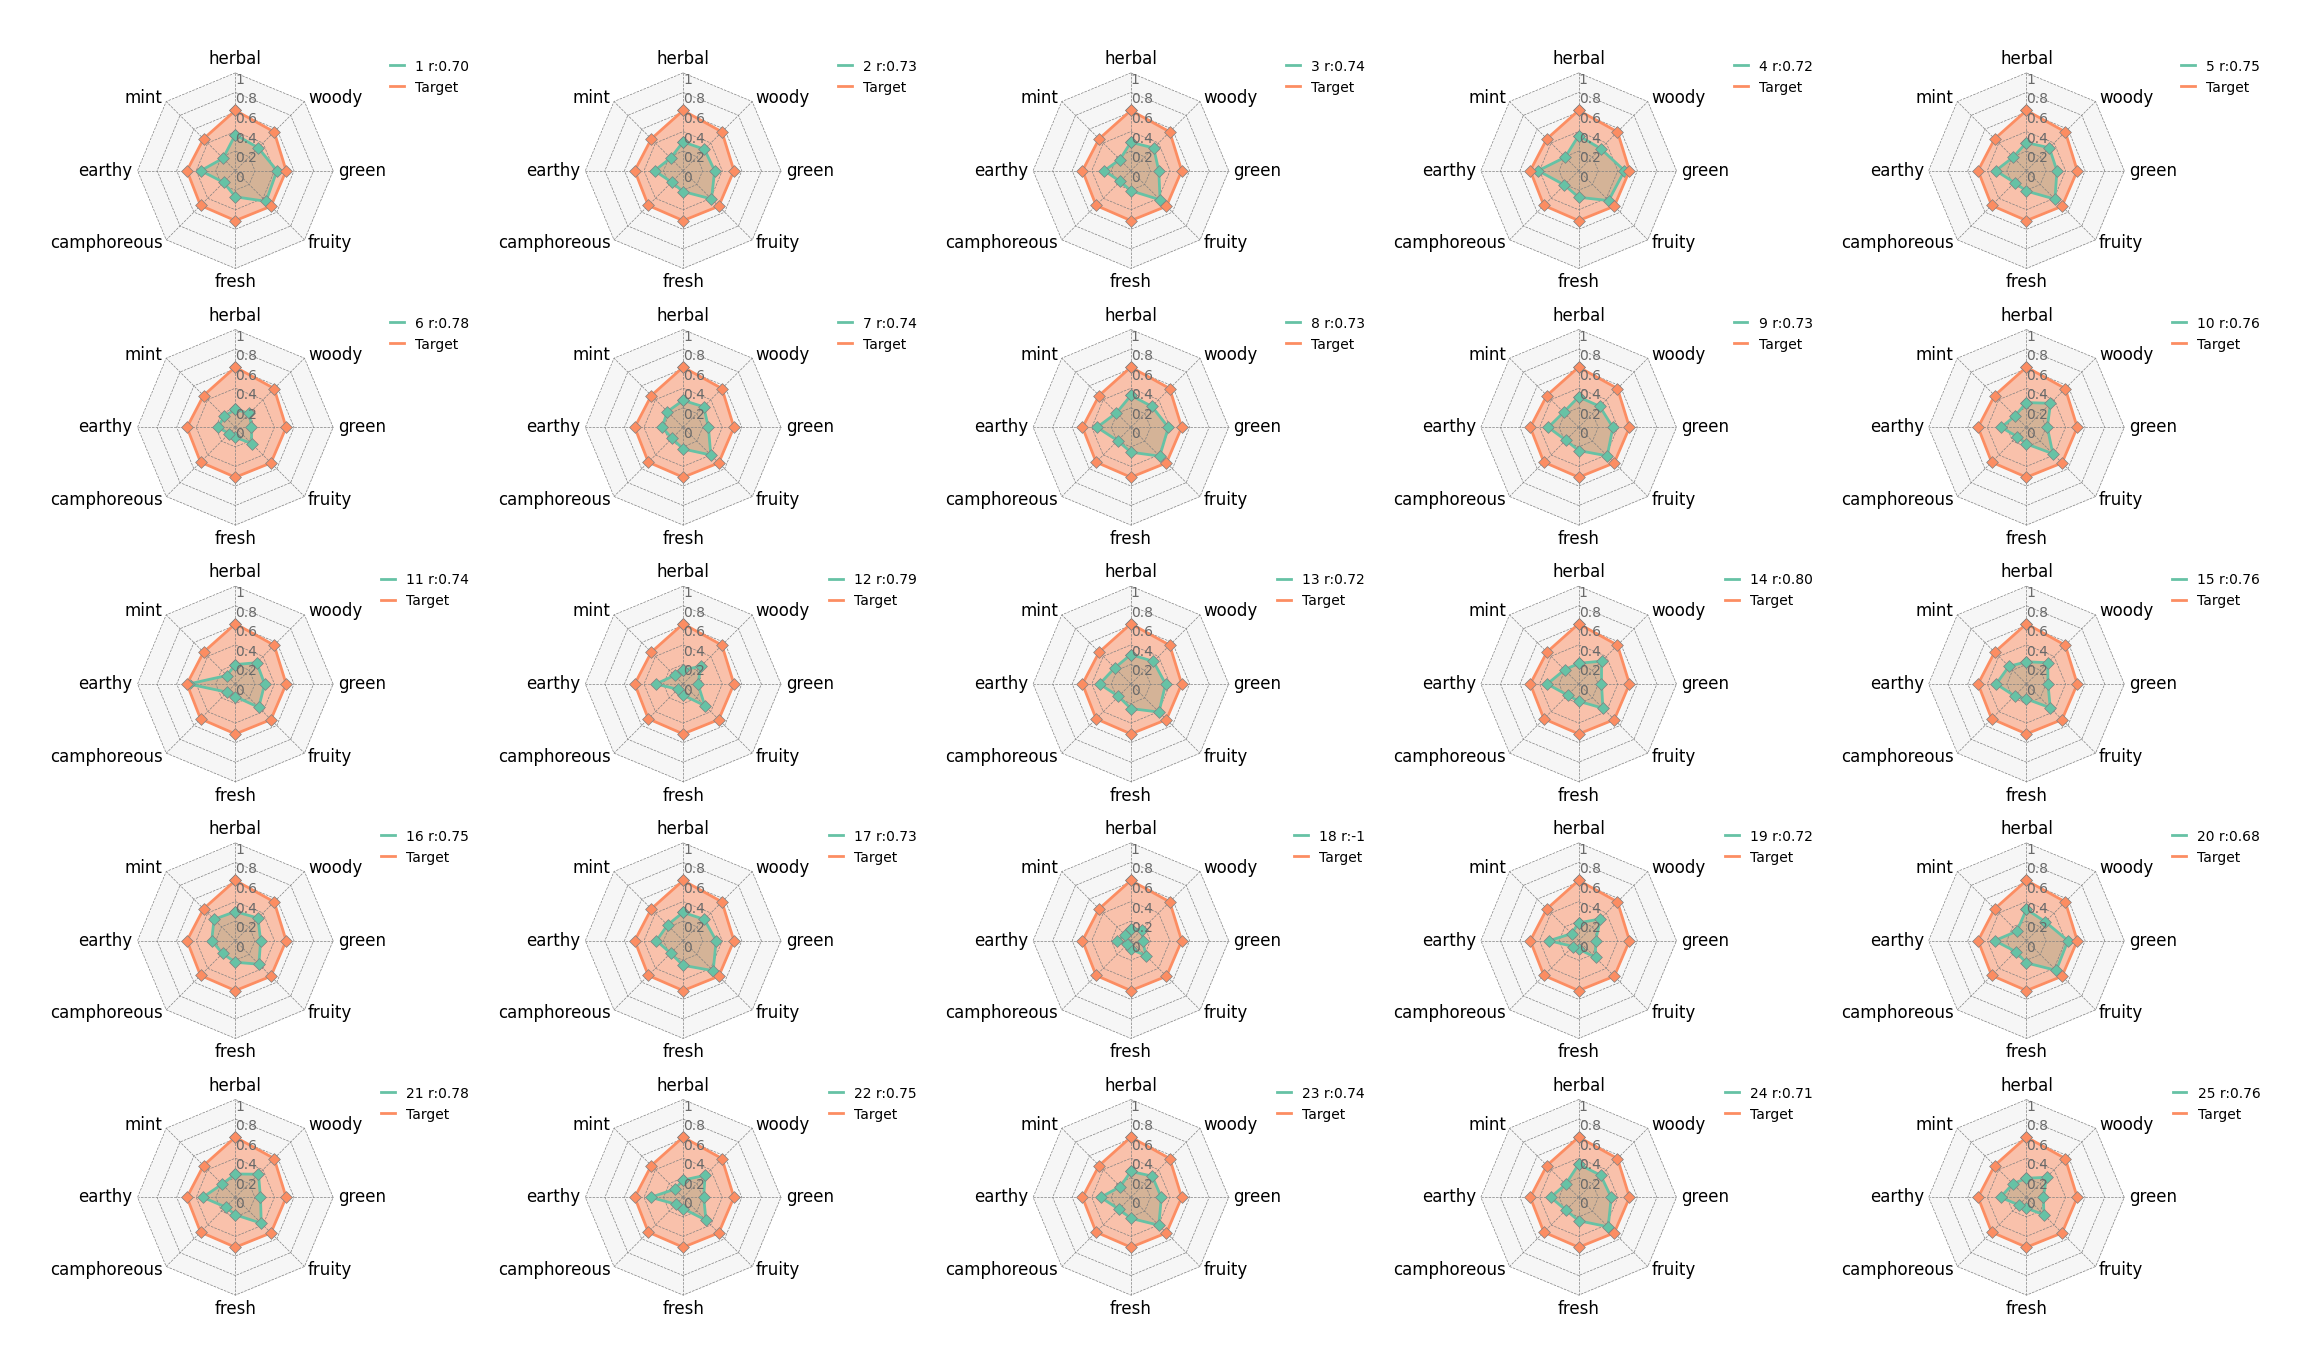

In [83]:


# Create 5 x 5 subplots
fig = plt.figure(figsize=(26, 16), dpi=100)
fig.subplots(5, 5, subplot_kw=dict(polar=True))
fig.subplots_adjust(wspace=1, hspace=0.25)

# Plot radar chart into subplots for each target
for target_name, ax in zip(plot_df.index, fig.axes):
    target_df = plot_df.loc[[target_name]]
    target_df = pd.concat([target_df, plot_target_df])
    # Initialize Circos instance for radar chart plot
    circos = Circos.radar_chart(
        target_df,
        vmax=1,
        marker_size=6,
        #cmap=dict(Hero="salmon", Warrior="skyblue", Wizard="lime", Assassin="magenta"),
        grid_interval_ratio=0.2,
        line_kws_handler=lambda _: dict(lw=2, ls="solid"),
        marker_kws_handler=lambda _: dict(marker="D", ec="grey", lw=0.5),
    )

    # Plot figure & set legend on upper right
    circos.plotfig(ax=ax)
    circos.ax.legend(loc="upper right", fontsize=10,bbox_to_anchor=(1.7, 1.1))

In [78]:
np.array(result_df[labels].sum())/len(result_df[labels])

array([0.05995543, 0.11770916, 0.15727852, 0.31326059, 0.12783672,
       0.3747793 , 0.16163549, 0.05580204, 0.08372282, 0.24644029,
       0.2505292 , 0.05264592, 0.17609397, 0.06224182, 0.13956971,
       0.24895823, 0.09086286, 0.08057499, 0.3823027 , 0.1737732 ,
       0.12967977, 0.14860569, 0.25545275, 0.07475504, 0.13512743,
       0.06313413, 0.15046977, 0.18489482, 0.20927325, 0.20088501,
       0.10334121, 0.14020291, 0.1273722 , 0.21772644, 0.17441086,
       0.30895635, 0.04945072, 0.17386217, 0.15681252, 0.1290583 ,
       0.33909127, 0.18139683, 0.04622186, 0.13549076, 0.20057446,
       0.29855117, 0.13621598, 0.16909724, 0.12709749, 0.21577373,
       0.33544526, 0.1880733 , 0.09973023, 0.36708736, 0.16353609,
       0.09104607, 0.15215756, 0.13582535, 0.1128882 , 0.13432352,
       0.28161418, 0.17359337, 0.18758734, 0.20311867, 0.25833598,
       0.25197047, 0.1435107 , 0.10136159, 0.04503134, 0.10612095,
       0.11025929, 0.07581776, 0.13877815, 0.18894821, 0.06013

In [90]:
import seaborn as sns

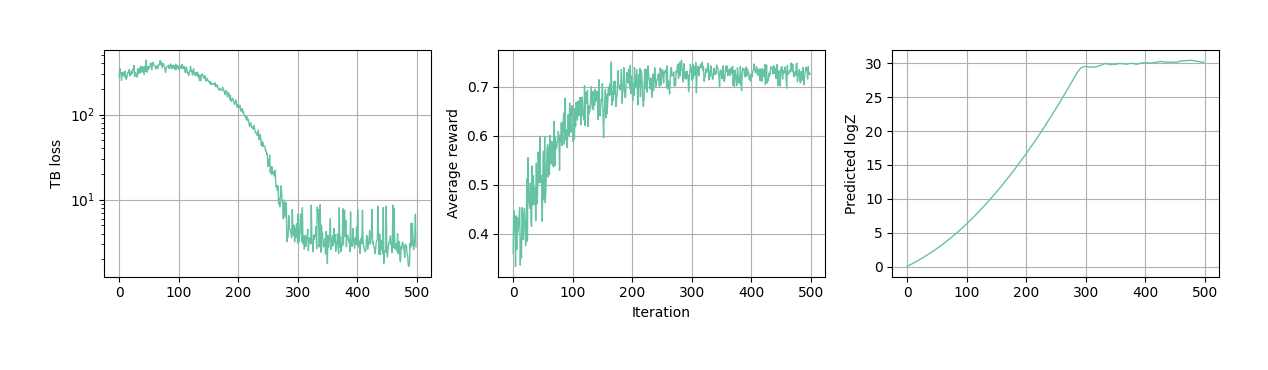

In [98]:
from gflownet.config import init_empty, Config
cfg = init_empty(Config())
from tensorboard.backend.event_processing import event_accumulator
cfg.log_dir = config.log_dir
ea = event_accumulator.EventAccumulator(cfg.log_dir)
ea.Reload()

import matplotlib.pyplot as pp
f, ax = pp.subplots(1, 3, figsize=(4*3,3))
ax[0].plot([i.value for i in ea.Scalars('train_loss')], color=sns.color_palette("Set2")[0],linewidth=1)
ax[0].set_yscale('log')
ax[0].set_ylabel('TB loss')
ax[0].grid()
ax[1].plot([i.value for i in ea.Scalars('train_sampled_reward_avg')], color=sns.color_palette("Set2")[0],linewidth=1)
ax[1].set_ylabel('Average reward')
ax[1].set_xlabel('Iteration')
ax[1].grid()
ax[2].plot([i.value for i in ea.Scalars('train_logZ')], color=sns.color_palette("Set2")[0],linewidth=1)
ax[2].set_ylabel('Predicted logZ')
ax[2].grid()
pp.tight_layout()
plt.savefig("images/pine_run_plots.pdf")